In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay   
from sklearn.metrics import confusion_matrix 

In [2]:
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")

In [3]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [4]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

EDA

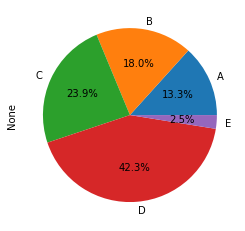

In [5]:
df_copy=df.copy()
df_copy.groupby(df_copy['Grade']).size().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# D-grade houses are more then the other graded house with 42.3% and E grade houses are less with just 2.5 % of total houses 

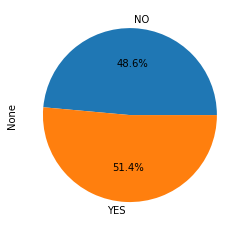

In [6]:
df_copy=df.copy()
df_copy.groupby(df_copy['roof']).size().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# houses with roof  are 51.4%
# houses without roof are 48.6% 

<AxesSubplot:xlabel='Area(total)', ylabel='Density'>

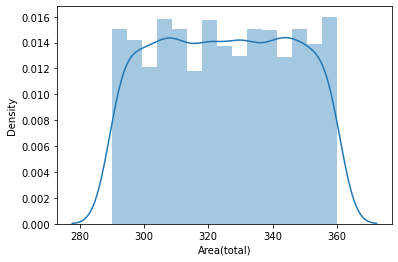

In [7]:
sns.distplot(df_copy["Area(total)"])

# houses area ranging from 290 and 360 sqfeet

<AxesSubplot:xlabel='Expected price', ylabel='Density'>

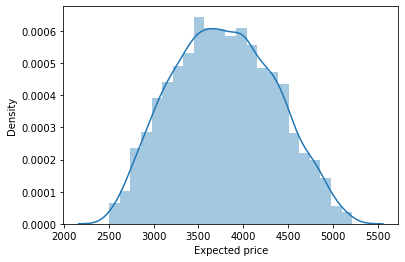

In [8]:
sns.distplot(df_copy["Expected price"])

 # price range from 2500 to 5200 

<AxesSubplot:xlabel='Trooms', ylabel='Expected price'>

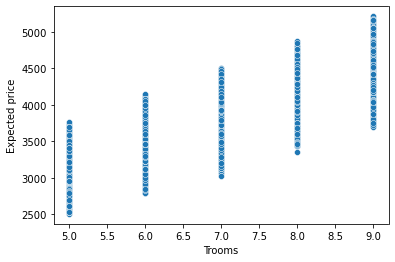

In [9]:
sns.scatterplot(x="Trooms",y="Expected price",data=df_copy)

 # As no. of rooms increasing the price also increasing

<AxesSubplot:xlabel='Nbedrooms', ylabel='Expected price'>

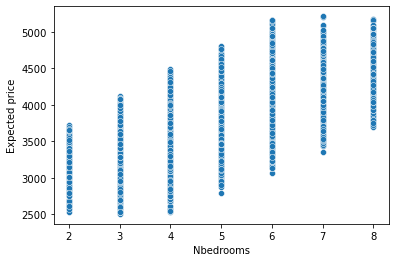

In [10]:
sns.scatterplot(x="Nbedrooms",y="Expected price",data=df_copy)

# As the  no. bedrooms are increasing the price also increasing 

<AxesSubplot:xlabel='API', ylabel='Expected price'>

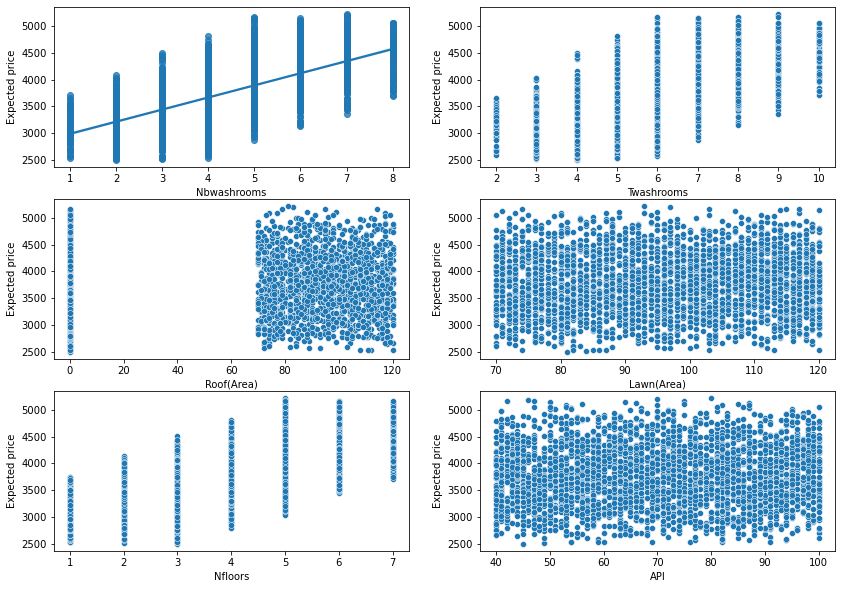

In [11]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))
sns.regplot(x="Nbwashrooms",y="Expected price",data=df_copy,scatter=True,fit_reg=True,ax=ax1)
sns.scatterplot(x="Twashrooms",y="Expected price",data=df_copy,ax=ax2)
sns.scatterplot(x="Roof(Area)",y="Expected price",data=df_copy,ax=ax3)
sns.scatterplot(x="Lawn(Area)",y="Expected price",data=df_copy,ax=ax4)
sns.scatterplot(x="Nfloors",y="Expected price",data=df_copy,ax=ax5)
sns.scatterplot(x="API",y="Expected price",data=df_copy,ax=ax6)

# there no relation between the lawn area of price  of the house 
# there is no relation between the Api and price of the house 
# there is no relation between the Roof area  and price of the house 

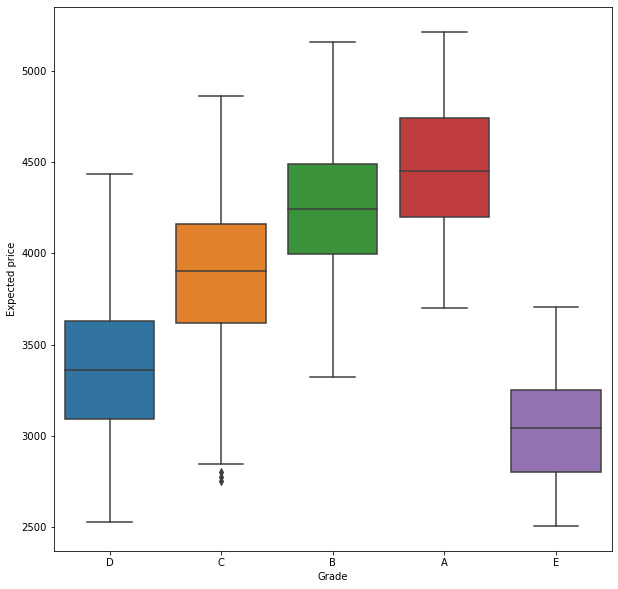

In [12]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.boxplot(x="Grade",y="Expected price",data=df_copy)

# A grade house cost more 
# E grade house cost less 

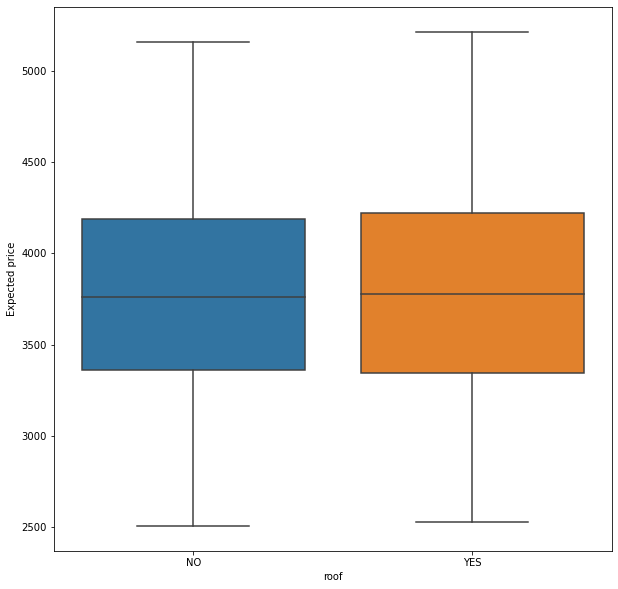

In [13]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.boxplot(x="roof",y="Expected price",data=df_copy)

# there is not much diffrence in the price of the house if it has as a roof or not 

In [14]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [15]:
# firstly we need to scale the  number data 
from sklearn.preprocessing import MinMaxScaler
numerics = ['int64']
df2 = df.select_dtypes(include=numerics)
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df2.to_numpy()),columns=df2.columns)


In [16]:
obj=[]
for i in df.select_dtypes("object"):
    obj.append(i)
for i in obj:
    df[i]=df[i].astype("category")

In [17]:
cat=[]
for i in df.select_dtypes("category"):
    cat.append(i)

In [18]:
for i in cat:
    df[i]=df[i].cat.codes

In [19]:
categorical=df[["roof","Grade"]]

In [20]:
model_data=pd.concat([df_scaled,categorical],axis=1,join="inner")

In [21]:
model_data.drop(["Id"],axis=1,inplace=True)

In [22]:
model_data

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof,Grade
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0,3
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1,3
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1,2
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1,3
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330,1,1
2996,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546,1,0
2997,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0,3
2998,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0,1


In [23]:
model_data.corr().style.background_gradient(cmap='CMRmap_r')

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof,Grade
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000
ANB,-0.010846,0.007321,0.015403,0.008475,0.016492,-0.015529,0.025751,0.020614,-0.025694,1.000000,0.015583,-0.020511,-0.024025


In [24]:
# Selecting Features having Correlation greater than 0.1
select = []
for i in model_data:
  if abs(model_data[i].corr(model_data["Grade"]))>=0.1 :
    select.append(i)

In [25]:
final_features=model_data[select]

In [26]:
final_features

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Nfloors,Expected price,roof,Grade
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.166667,0.360251,0,3
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.333333,0.370944,1,3
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.666667,0.458702,1,2
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.166667,0.232301,1,3
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.333333,0.493732,0,3
...,...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.666667,0.642330,1,1
2996,0.028571,1.00,1.000000,0.857143,0.750,0.966667,1.000000,0.460546,1,0
2997,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.666667,0.406711,0,3
2998,0.042857,1.00,0.833333,0.857143,0.750,0.000000,1.000000,0.624631,0,1


In [27]:
x1=final_features.drop(["Grade"],axis=1)
y1=final_features["Grade"]

In [28]:
from sklearn.model_selection import train_test_split  
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=0)  


# logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression  
classifier1= LogisticRegression(random_state=0)  
classifier1.fit(x1_train, y1_train)

LogisticRegression(random_state=0)

In [30]:
y1_pred= classifier1.predict(x1_test)  

In [31]:
predicted=pd.DataFrame(y1_pred,y1_test)

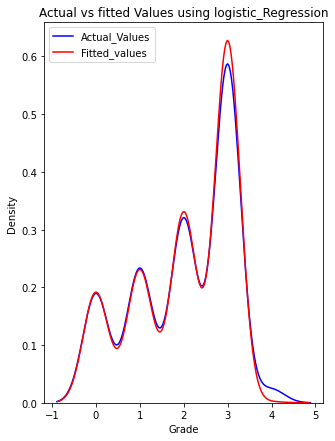

In [62]:
import seaborn as sns 
plt.figure(figsize=(5,7))
ax=sns.distplot(y1_test,hist=False,color="b",label="Actual_Values")
sns.distplot(y1_pred,hist=False,color="r",label="Fitted_values",ax=ax)
plt.title("Actual vs fitted Values using logistic_Regression")
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       105
           1       0.85      0.82      0.83       129
           2       0.87      0.88      0.87       177
           3       0.93      0.97      0.95       326
           4       1.00      0.08      0.14        13

    accuracy                           0.90       750
   macro avg       0.91      0.73      0.74       750
weighted avg       0.90      0.90      0.89       750



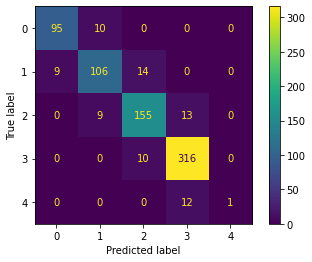

In [60]:
cm= confusion_matrix(y1_test,y1_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [34]:
from sklearn.ensemble import RandomForestClassifier
regressor =RandomForestClassifier(n_estimators=10, random_state=1)
regressor.fit(x1_train,y1_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [35]:
 rf_y1_pred=regressor.predict(x1_test)

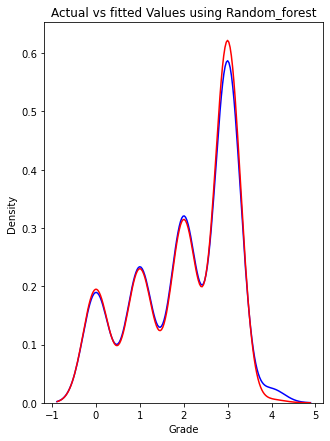

In [36]:
plt.figure(figsize=(5,7))
ax=sns.distplot(y1_test,hist=False,color="b",label="Actual_Values")
sns.distplot(rf_y1_pred,hist=False,color="r",label="Fitted_values",ax=ax)
plt.title("Actual vs fitted Values using Random_forest")
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,rf_y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       105
           1       0.83      0.81      0.82       129
           2       0.86      0.84      0.85       177
           3       0.92      0.97      0.94       326
           4       0.67      0.15      0.25        13

    accuracy                           0.89       750
   macro avg       0.83      0.74      0.75       750
weighted avg       0.88      0.89      0.88       750



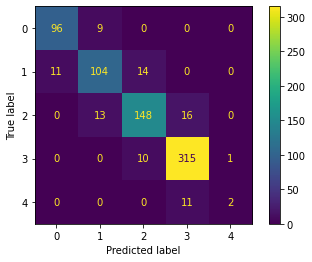

In [59]:
cm= confusion_matrix(y1_test,rf_y1_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

DECISION_TREE_CLASSIFIER

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [39]:
dt_y1_pred=model.predict(x1_test)

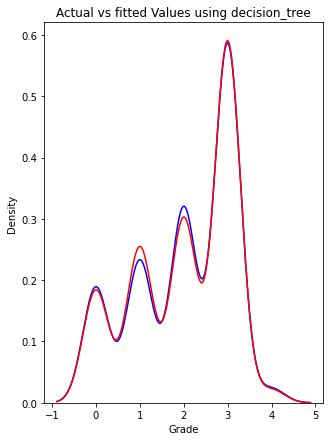

In [40]:
plt.figure(figsize=(5,7))
ax=sns.distplot(y1_test,hist=False,color="b",label="Actual_Values")
sns.distplot(dt_y1_pred,hist=False,color="r",label="Fitted_values",ax=ax)
plt.title("Actual vs fitted Values using decision_tree")
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,dt_y1_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.73      0.80      0.76       129
           2       0.80      0.75      0.77       177
           3       0.91      0.91      0.91       326
           4       0.33      0.31      0.32        13

    accuracy                           0.83       750
   macro avg       0.73      0.72      0.72       750
weighted avg       0.84      0.83      0.83       750



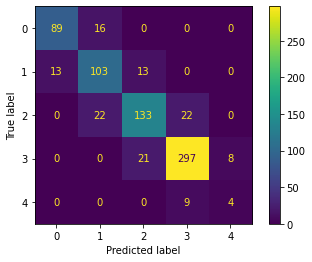

In [58]:
cm= confusion_matrix(y1_test,dt_y1_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [42]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)

In [43]:
# Train Adaboost Classifer
model2 = abc.fit(x1_train, y1_train)

#Predict the response for test dataset
adc_y1_pred = model2.predict(x1_test)


In [44]:
print(classification_report(y1_test,adc_y1_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.46      0.92      0.61       129
           2       0.80      0.41      0.54       177
           3       0.77      0.70      0.73       326
           4       0.11      0.85      0.19        13

    accuracy                           0.58       750
   macro avg       0.43      0.58      0.42       750
weighted avg       0.60      0.58      0.56       750



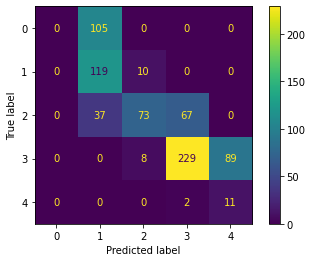

In [61]:
cm= confusion_matrix(y1_test,adc_y1_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [45]:
model_list=["logistic_regression","Random_forest","Decision_tree","Adaboost"]
acc=[0.90, 0.89,0.85,0.58 ]

In [46]:
pd.DataFrame({"model":model_list,"accuracy":acc})

,model,accuracy
0,logistic_regression,0.90
1,Random_forest,0.89
2,Decision_tree,0.85
3,Adaboost,0.58
